<a href="https://colab.research.google.com/github/TiagoSpiandorello/Analise_de_portfolio_de_acoes/blob/main/analise_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
# Importação das bibliotecas necessárias para o projeto

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
from scipy.stats import norm
%matplotlib inline

In [86]:
# Extração dos dados de um portfólio de ações do site Yahoo Finance

# PETR4 = Petrobras
# BBDC4 = Bradesco
# ABEV3 = AMBEV
# WEGE3 = Weg
# VALE3 - Vale

tickers = ['PETR4.SA','BBDC4.SA','ABEV3.SA','WEGE3.SA','VALE3.SA']
bolsas = pd.DataFrame()
for t in tickers:
    bolsas[t] = wb.DataReader(t, data_source='yahoo',start='2010-1-1')['Adj Close']

bolsas.tail(10)

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA
Date,,,,,
2021-06-09,28.660000,28.100000,19.309999,34.250000,112.199997
2021-06-10,28.680000,28.150000,19.320000,33.930000,111.830002
2021-06-11,28.570000,28.040001,18.940001,34.209999,114.339996
2021-06-14,28.750000,27.920000,19.480000,34.880001,113.720001
2021-06-15,29.030001,27.940001,19.129999,35.459999,111.500000
2021-06-16,29.139999,28.080000,19.090000,34.830002,108.150002
2021-06-17,28.129999,27.959999,19.010000,34.419998,105.900002
2021-06-18,28.320000,27.600000,18.760000,35.189999,109.089996
2021-06-21,28.950001,27.670000,18.730000,35.250000,110.110001


## Normalização dos dados para base 100

### (P1 / P0) * 100

#### Essa manipulação permite comparar o comportamento das ações em uma situação hipotética em que todas iniciam com valor 100. 

In [87]:
bolsas.iloc[0]

PETR4.SA    28.142263
BBDC4.SA    10.765183
ABEV3.SA     4.187932
WEGE3.SA     2.144630
VALE3.SA    32.089706
Name: 2010-01-04 00:00:00, dtype: float64

<function matplotlib.pyplot.show>

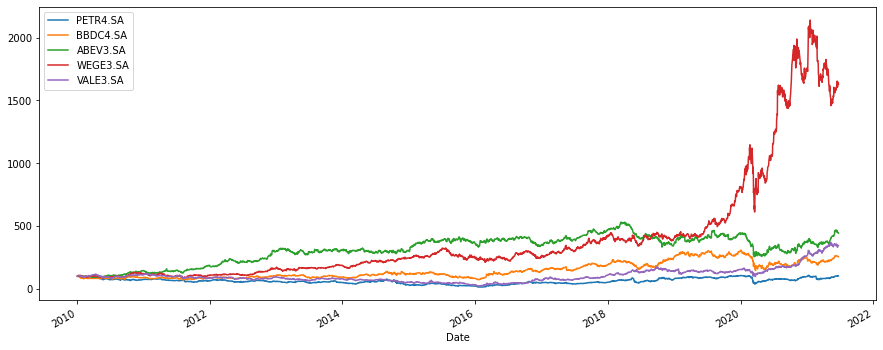

In [88]:
(bolsas / bolsas.iloc[0] * 100).plot(figsize= (15,6));
plt.show

# Taxa de retorno das ações

## Taxa de retorno simples = (preço final - preço inicial) / preço inicial


In [89]:
retorno_simples = (bolsas / bolsas.shift(1)) - 1
retorno_simples.head()

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.008574,-0.004956,0.005882,-0.002182,0.009322
2010-01-06,0.013513,-0.008000,0.010202,0.005468,0.021166
2010-01-07,-0.009333,-0.002688,0.004695,0.016857,0.004145
2010-01-08,-0.005384,-0.001079,-0.001921,0.036363,0.009758


In [90]:
# Peso é o percentual que cada ação representa no portfólio. 

# No primeiro cenário, as ações estão distribuídas igualmente, cada uma representando 20% do total de ações.

pesos = np.array([0.2,0.2,0.2,0.2,0.2])
np.dot(retorno_simples, pesos)

array([        nan, -0.0001016 ,  0.00846972, ...,  0.00664427,
        0.0068476 , -0.00468811])

In [91]:
# Retorno anual médio

retorno_anual = retorno_simples.mean() * 250
retorno_anual

PETR4.SA    0.113781
BBDC4.SA    0.141641
ABEV3.SA    0.166008
WEGE3.SA    0.295570
VALE3.SA    0.197056
dtype: float64

In [92]:
np.dot(retorno_anual, pesos)

0.18281124697851642

In [93]:
pfolio1 = str(round(np.dot(retorno_anual, pesos), 5) * 100) + ' %'
print('Esta carteira de ações possui um retorno de ' + pfolio1)

Esta carteira de ações possui um retorno de 18.281 %


In [94]:
# No segundo cenário, as ações não estão distribuídas igualmente, de forma que a WEGE3 representa 40%, a PETR4 10% e as restantes 20% cada do total de ações.
 
pesos2 = np.array([0.1,0.2,0.2,0.4,0.2])
pfolio2 = str(round(np.dot(retorno_anual, pesos2), 5) * 100) + ' %'
print('Esta carteira de ações possui um retorno de ' + pfolio2)

Esta carteira de ações possui um retorno de 23.055 %


In [95]:
if (pfolio1 > pfolio2):
  print('O primeiro portfólio possui rendimento superior ao segundo.')
elif (pfolio1 < pfolio2):
  print('O segundo portfólio possui rendimento superior ao primeiro.')
else:
  print('Ambos portfólios possuem o mesmo rendimento.')

O segundo portfólio possui rendimento superior ao primeiro.


In [96]:
# Cálculo da taxa de retorno logarítmica das ações

retorno = np.log(bolsas / bolsas.shift(1))
retorno

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.008611,-0.004968,0.005865,-0.002185,0.009279
2010-01-06,0.013423,-0.008032,0.010150,0.005453,0.020945
2010-01-07,-0.009377,-0.002691,0.004684,0.016717,0.004137
2010-01-08,-0.005398,-0.001079,-0.001923,0.035718,0.009711
...,...,...,...,...,...
2021-06-16,0.003782,0.004998,-0.002093,-0.017926,-0.030505
2021-06-17,-0.035275,-0.004283,-0.004199,-0.011841,-0.021024
2021-06-18,0.006732,-0.012959,-0.013238,0.022124,0.029678


## Taxa de retorno logarítmica = log preço final / log preço inicial


In [97]:
acao1 = retorno.columns[0]
acao2 = retorno.columns[1]
acao3 = retorno.columns[2]
acao4 = retorno.columns[3]
acao5 = retorno.columns[4]

In [98]:
media1 = retorno[acao1].mean()
media2 = retorno[acao2].mean()
media3 = retorno[acao3].mean()
media4 = retorno[acao4].mean()
media5 = retorno[acao5].mean()

std1 = retorno[acao1].std()
std2 = retorno[acao1].std()
std3 = retorno[acao1].std()
std4 = retorno[acao1].std()
std5 = retorno[acao1].std()

LOGN_var1 = retorno[acao1].var()
LOGN_var2 = retorno[acao2].var()
LOGN_var3 = retorno[acao2].var()
LOGN_var4 = retorno[acao4].var()
LOGN_var5 = retorno[acao5].var()

print(str(acao1) + "= Retorno Médio: " + str(media1) + " - Desvio Padrão: " + str(std1) + " - Variância: " + str(LOGN_var1))
print(str(acao2) + "= Retorno Médio: " + str(media2) + " - Desvio Padrão: " + str(std2) + " - Variância: " + str(LOGN_var2))
print(str(acao3) + "= Retorno Médio: " + str(media3) + " - Desvio Padrão: " + str(std3) + " - Variância: " + str(LOGN_var3))
print(str(acao4) + "= Retorno Médio: " + str(media4) + " - Desvio Padrão: " + str(std4) + " - Variância: " + str(LOGN_var4))
print(str(acao5) + "= Retorno Médio: " + str(media5) + " - Desvio Padrão: " + str(std5) + " - Variância: " + str(LOGN_var5))

PETR4.SA= Retorno Médio: 9.967505435433668e-06 - Desvio Padrão: 0.02996861276627136 - Variância: 0.0008981177511347227
BBDC4.SA= Retorno Médio: 0.0003299673487898763 - Desvio Padrão: 0.02996861276627136 - Variância: 0.0004735778976997714
ABEV3.SA= Retorno Médio: 0.0005244106209862425 - Desvio Padrão: 0.02996861276627136 - Variância: 0.0004735778976997714
WEGE3.SA= Retorno Médio: 0.0009823693579363512 - Desvio Padrão: 0.02996861276627136 - Variância: 0.0004000258715829324
VALE3.SA= Retorno Médio: 0.0004354699658409852 - Desvio Padrão: 0.02996861276627136 - Variância: 0.0007066136172853382


# Índices de ações

### São uma excelente base comparativa para entender como suas ações estão performando.

### Indicam o que esperar se você investir em um portfólio diversificado

In [99]:
# ^BVSP = IBOVESPA - Brasil
# ^GSPC = S&P500 - EUA
# ^IXIC = NASDAQ - EUA
# ^GDAXI = DAX - Alemanha

tickers = ['^GSPC','^IXIC','^GDAXI','^BVSP']
ind_data = pd.DataFrame()
for t in tickers:
    ind_data[t] = wb.DataReader(t, data_source='yahoo',start='2015-1-1')['Adj Close']

In [100]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI,^BVSP
Date,,,,
2015-01-02,2058.199951,4726.810059,9764.730469,48512.0
2015-01-05,2020.579956,4652.569824,9473.160156,47517.0
2015-01-06,2002.609985,4592.740234,9469.660156,48001.0
2015-01-07,2025.900024,4650.470215,9518.179688,49463.0
2015-01-08,2062.139893,4736.189941,9837.610352,49943.0


<function matplotlib.pyplot.show>

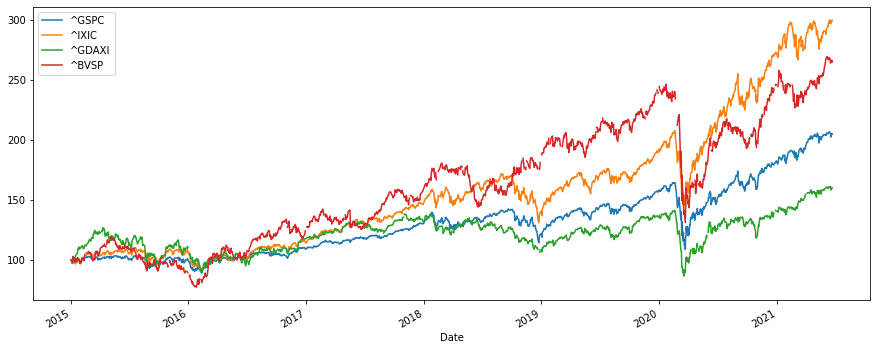

In [101]:
# Normalização dos índices para base 100

(ind_data / ind_data.iloc[0] * 100).plot(figsize=(15,6));
plt.show

In [102]:
# Retorno simples dos índices

retorno_indices = (ind_data / ind_data.shift(1)) - 1
retorno_indices.tail()

,^GSPC,^IXIC,^GDAXI,^BVSP
Date,,,,
2021-06-16,-0.005390,-0.002358,-0.001205,-0.006396
2021-06-17,-0.000436,0.008666,0.001088,-0.009299
2021-06-18,-0.013124,-0.009248,-0.017779,0.002718
2021-06-21,0.014002,0.007919,0.010047,0.006698
2021-06-22,-0.000672,0.001714,-0.000096,-0.006474


In [103]:
# Retorno anual dos índices

retorno_anual_ind = retorno_indices.mean() * 250
retorno_anual_ind

^GSPC     0.127168
^IXIC     0.189969
^GDAXI    0.088561
^BVSP     0.180061
dtype: float64

# Compara retorno das ações com índices

In [104]:
tickers = ['PETR4.SA','BBDC4.SA','ABEV3.SA','WEGE3.SA','VALE3.SA','^BVSP']
bolsas = pd.DataFrame()
for t in tickers:
    bolsas[t] = wb.DataReader(t, data_source='yahoo',start='2010-1-1')['Adj Close']

<function matplotlib.pyplot.show>

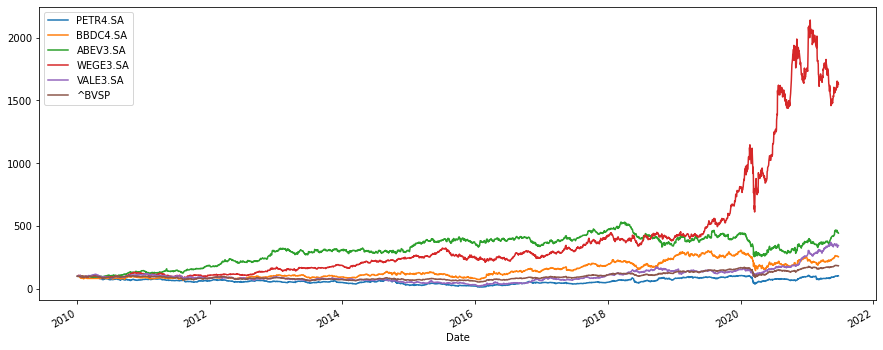

In [105]:
(bolsas / bolsas.iloc[0] * 100).plot(figsize=(15,6));
plt.show

# Cálculo do risco de um ativo

### A volatilidade identifica a variabilidade dos rendimentos. Quanto menor a varição, mais estável e menos risco de perdas.

In [106]:
retorno_risco = np.log(bolsas / bolsas.shift(1))
retorno_risco

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA,^BVSP
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.008611,-0.004968,0.005865,-0.002185,0.009279,0.002780
2010-01-06,0.013423,-0.008032,0.010150,0.005453,0.020945,0.006938
2010-01-07,-0.009377,-0.002691,0.004684,0.016717,0.004137,-0.003938
2010-01-08,-0.005398,-0.001079,-0.001923,0.035718,0.009711,-0.002672
...,...,...,...,...,...,...
2021-06-16,0.003782,0.004998,-0.002093,-0.017926,-0.030505,-0.006416
2021-06-17,-0.035275,-0.004283,-0.004199,-0.011841,-0.021024,-0.009343
2021-06-18,0.006732,-0.012959,-0.013238,0.022124,0.029678,0.002714


In [107]:
acao1 = retorno_risco.columns[0]
acao2 = retorno_risco.columns[1]
acao3 = retorno_risco.columns[2]
acao4 = retorno_risco.columns[3]
acao5 = retorno_risco.columns[4]

In [108]:
media = retorno_risco[[acao1,acao2,acao3,acao4,acao5]].mean() * 250
print('Quanto maior a média de retorno anual, maior a lucratividade que a ação rendeu.')
print('Média de retorno anual das ações:')
media

Quanto maior a média de retorno anual, maior a lucratividade que a ação rendeu.
Média de retorno anual das ações:


PETR4.SA    0.002522
BBDC4.SA    0.082460
ABEV3.SA    0.131055
WEGE3.SA    0.245643
VALE3.SA    0.108867
dtype: float64

In [109]:
desvio_padrao = retorno_risco[[acao1,acao2,acao3,acao4,acao5]].std() * 250 ** 0.5
print('Quanto maior a volatilidade, maior a chance de ganhos e de perdas bruscas.')
print('Média anual do desvio padrão (volatilidade) das ações:')
desvio_padrao

Quanto maior a volatilidade, maior a chance de ganhos e de perdas bruscas.
Média anual do desvio padrão (volatilidade) das ações:


PETR4.SA    0.473845
BBDC4.SA    0.344086
ABEV3.SA    0.264343
WEGE3.SA    0.316236
VALE3.SA    0.420302
dtype: float64

# Diversificação - Relação entre o preço das ações de diversas empresas

## Covariância

cov > 0 => variáveis se movem na mesma direção

cov < 0 => variáveis se movem em direções opostas

cov = 0 => variáveis são independentes

In [110]:
cov_matrix = retorno_risco.cov()
cov_matrix.round(6)

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA,^BVSP
PETR4.SA,0.000898,0.000380,0.000170,0.000181,0.000378,0.000360
BBDC4.SA,0.000380,0.000474,0.000159,0.000149,0.000227,0.000273
ABEV3.SA,0.000170,0.000159,0.000280,0.000112,0.000121,0.000143
WEGE3.SA,0.000181,0.000149,0.000112,0.000400,0.000128,0.000151
VALE3.SA,0.000378,0.000227,0.000121,0.000128,0.000707,0.000263
^BVSP,0.000360,0.000273,0.000143,0.000151,0.000263,0.000252


In [111]:
cov_matrix_anual = retorno_risco.cov() * 250
cov_matrix_anual.round(3)

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA,^BVSP
PETR4.SA,0.225,0.095,0.043,0.045,0.095,0.090
BBDC4.SA,0.095,0.118,0.040,0.037,0.057,0.068
ABEV3.SA,0.043,0.040,0.070,0.028,0.030,0.036
WEGE3.SA,0.045,0.037,0.028,0.100,0.032,0.038
VALE3.SA,0.095,0.057,0.030,0.032,0.177,0.066
^BVSP,0.090,0.068,0.036,0.038,0.066,0.063


# Correlação

corr = 1 => correlação perfeita

corr > 0 => variáveis se movem na mesma direção

corr = -1 => correlação perfeitamente negativa

corr < 0 => variáveis se movem em direções opostas

corr = 0 => variáveis absolutamente independentes

In [112]:
# Correlação entre o retorno das ações

corr_matrix = retorno_risco.corr()
corr_matrix.round(2)

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA,^BVSP
PETR4.SA,1.00,0.58,0.34,0.30,0.47,0.75
BBDC4.SA,0.58,1.00,0.44,0.34,0.39,0.79
ABEV3.SA,0.34,0.44,1.00,0.33,0.27,0.54
WEGE3.SA,0.30,0.34,0.33,1.00,0.24,0.48
VALE3.SA,0.47,0.39,0.27,0.24,1.00,0.62
^BVSP,0.75,0.79,0.54,0.48,0.62,1.00


<function matplotlib.pyplot.show>

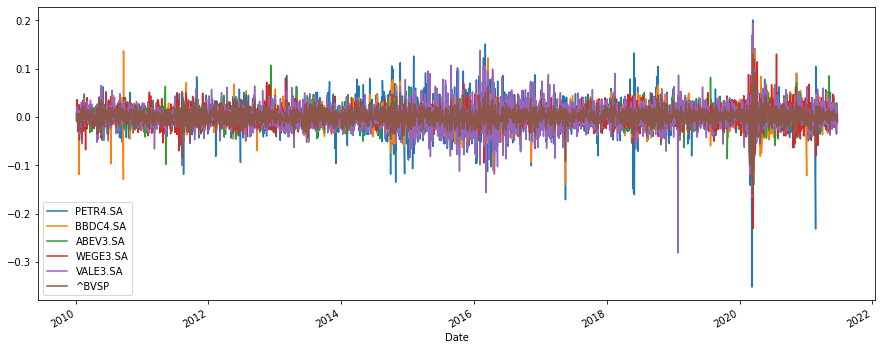

In [113]:
retorno_risco.plot(figsize = (15, 6));
plt.show

In [114]:
# Correlação entre o preço das ações

corr_matrix = bolsas.corr()
corr_matrix.round(2)

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA,^BVSP
PETR4.SA,1.00,0.52,-0.19,0.40,0.70,0.78
BBDC4.SA,0.52,1.00,0.67,0.61,0.60,0.85
ABEV3.SA,-0.19,0.67,1.00,0.34,0.13,0.31
WEGE3.SA,0.40,0.61,0.34,1.00,0.82,0.78
VALE3.SA,0.70,0.60,0.13,0.82,1.00,0.88
^BVSP,0.78,0.85,0.31,0.78,0.88,1.00


<function matplotlib.pyplot.show>

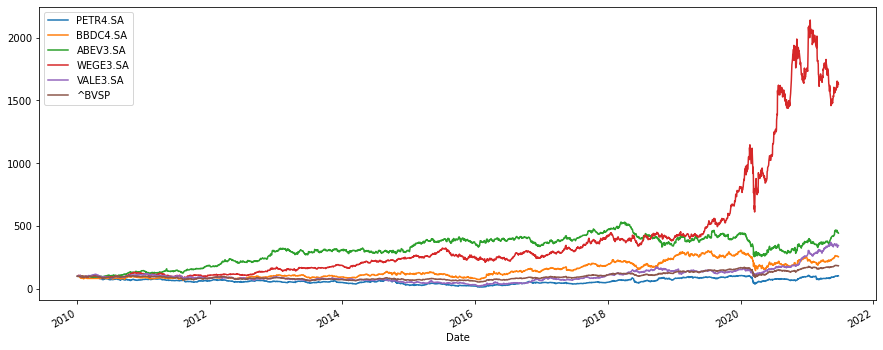

In [115]:
(bolsas / bolsas.iloc[0] * 100).plot(figsize = (15, 6));
plt.show

# Risco do portfólio

In [116]:
# Portfolio com ações de 5 empresas distribuídas igualmente, cada uma representando 20% do total.

bolsas = bolsas[['PETR4.SA','BBDC4.SA','ABEV3.SA','WEGE3.SA','VALE3.SA']]
retorno_risco = retorno_risco[['PETR4.SA','BBDC4.SA','ABEV3.SA','WEGE3.SA','VALE3.SA']]
weights = np.array([0.2,0.2,0.2,0.2,0.2])

In [117]:
# Variância do portfólio

pfolio_var = np.dot(weights.T, np.dot(retorno_risco.cov() * 250, weights))
print('A variância do portfólio de ações é de: ' + str(pfolio_var.round(4)))

A variância do portfólio de ações é de: 0.0677


In [118]:
# Volatilidade do portfólio

pfolio_vol = np.dot(weights.T, np.dot(retorno_risco.cov() * 250, weights)) ** 0.5
print('A volatilidade do portfólio de ações é de: ' + str(pfolio_vol.round(4) * 100) + '%')

A volatilidade do portfólio de ações é de: 26.009999999999998%


## Risco diversificável e não diversificável do portfólio

### risco diversificável = variância do portfólio - variância anual ponderada


In [132]:
# Risco diversificável
# Portfólio com 2 ações, distribuídas igualmente em 50% de cada.

bolsas = bolsas[['PETR4.SA','BBDC4.SA']]
retorno_risco = retorno_risco[['PETR4.SA','BBDC4.SA']]
pfolio_var = np.dot(weights.T, np.dot(retorno_risco.cov() * 250, weights))
weights = np.array([0.5,0.5])

In [136]:
PETR_var_a = retorno_risco['PETR4.SA'].var() * 250
BBDC_var_a = retorno_risco['BBDC4.SA'].var() * 250

dr = pfolio_var - (weights[0] ** 2 * PETR_var_a) - (weights[1] ** 2 * BBDC_var_a)
print('O risco diversificável do portfólio é de ' + str(round(dr * 100, 2)) + '%.')

O risco diversificável do portfólio é de 4.75%.


In [137]:
# Risco não diversificável

n_dr_1 = pfolio_var - dr
n_dr_1

0.08573110507471572

# Análise de Regressão

# Otimização de Portfólio de Markowitz

In [121]:
retorno.mean() * 250

PETR4.SA    0.002492
BBDC4.SA    0.082492
ABEV3.SA    0.131103
WEGE3.SA    0.245592
VALE3.SA    0.108867
dtype: float64

In [122]:
retorno.cov() * 250

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA
PETR4.SA,0.224529,0.095028,0.042518,0.045314,0.094540
BBDC4.SA,0.095028,0.118394,0.039739,0.037336,0.056628
ABEV3.SA,0.042518,0.039739,0.069876,0.027974,0.030232
WEGE3.SA,0.045314,0.037336,0.027974,0.100006,0.031916
VALE3.SA,0.094540,0.056628,0.030232,0.031916,0.176653


In [123]:
retorno.corr()

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA
PETR4.SA,1.000000,0.582840,0.339448,0.302398,0.474700
BBDC4.SA,0.582840,1.000000,0.436900,0.343121,0.391563
ABEV3.SA,0.339448,0.436900,1.000000,0.334640,0.272106
WEGE3.SA,0.302398,0.343121,0.334640,1.000000,0.240126
VALE3.SA,0.474700,0.391563,0.272106,0.240126,1.000000


In [124]:
num_tickers = len(tickers)
num_tickers

6

In [125]:
weights = np.random.random(num_tickers)
weights /= np.sum(weights)
weights

array([0.27380021, 0.20940565, 0.20825441, 0.03972739, 0.06498989,
       0.20382245])

In [126]:
weights[0] + weights[1] + weights[2] + weights[3] + weights[4]

0.7961775500966308

# Retorno esperado do Portfólio

In [127]:
np.sum(weights * retorno.mean()) * 250

ValueError: ignored

# Variância esperada do Portfólio

In [ ]:
np.dot(weights.T, np.dot(retorno.cov() *250, weights))

# Volatilidade esperada do Portfólio

In [ ]:
np.sqrt(np.dot(weights.T, np.dot(retorno.cov() *250, weights)))

# 1.000 combinações diferentes dos mesmos ativos

In [ ]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (10000):
    weights = np.random.random(num_tickers)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * retorno.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(retorno.cov() *250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

In [ ]:
portfolios = pd.DataFrame({'Retorno': pfolio_returns, 'Volatilidade': pfolio_volatilities})
portfolios.head()

In [ ]:
portfolios.plot(x='Volatilidade', y='Retorno', kind='scatter', figsize=(10,6))
plt.xlabel('Volatilidade esperada')
plt.ylabel('Retorno esperado')

In [ ]:
(bolsas / bolsas.iloc[0] * 100).plot(figsize = (15, 6));
plt.show

In [ ]:
bolsas.plot(figsize = (15, 6));
plt.show

# CAPM

### Medindo o Beta
### Mede o risco de mercado que não pode ser evitado através da diversificação.
### Quanto mais volátil uma ação, maior seu beta. O beta varia entre -1 e 2.
### B = 0 nenhuma relação; B < 1 defensiva; B > 1 agressiva
### Ações defensivas perdem menos quando a economia está mal e ganham menos quando estão bem; agressivas são o oposto.

In [ ]:
tickers = ['PETR4.SA','BBDC4.SA','ABEV3.SA','WEGE3.SA','VALE3.SA','^BVSP']
data = pd.DataFrame()
for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo',start='2015-1-1')['Adj Close']

In [ ]:
sec_returns = np.log( data / data.shift(1))

In [ ]:
cov = sec_returns.cov() * 250
cov

In [ ]:
# Covariação da primeira ação com o mercado.

cov_with_market = cov.iloc[0,5]
cov_with_market

In [ ]:
market_var = sec_returns['^BVSP'].var() * 250
market_var

In [ ]:
logn_beta = cov_with_market / market_var
logn_beta

In [ ]:
# Covariação da seegunda ação com o mercado.

cov_with_market = cov.iloc[1,5]
cov_with_market

In [ ]:
market_var = sec_returns['^BVSP'].var() * 250
market_var

In [ ]:
vvar_beta = cov_with_market / market_var
vvar_beta

# Modelo de Precificação de Ativos Financeiros (CAPM)

### Ação livre de risco = retorno de 2,5%.
### Beta
### Prêmio de risco das ações = entre 4,5% e 5,5%
### Retorno esperado para valer a pena investir na ação


In [ ]:
logn_er = 0.025 + logn_beta * 0.05
logn_er

In [ ]:
vvar_beta = 0.025 + vvar_beta * 0.05
vvar_beta

### Se o retorno ficar abaixo do calculado, não vale a pena investir nessa ação.

# Índice de Sharp
## Decidir o melhor portfólio em termos de risco e retorno

In [ ]:
sharpe_logn = (logn_er - 0.025) / (sec_returns['PETR4.SA'].std() * 250 ** 0.5)
sharpe_logn

In [ ]:
sharpe_vvar = (logn_er - 0.025) / (sec_returns['BBDC4.SA'].std() * 250 ** 0.5)
sharpe_vvar

# Simulações de Monte Carlo
### Observar os possíveis diferentes resultados de um evento futuro
### 1 - Prever o preço da ação

In [ ]:
log_returns_1 = np.log(1 + data['BBDC4.SA'].pct_change())

In [ ]:
log_returns_1.tail()

In [ ]:
data['BBDC4.SA'].plot(figsize=(10,6))

In [ ]:
log_returns_1.plot(figsize=(10,6))

In [ ]:
u = log_returns_1.mean()
u

In [ ]:
var = log_returns_1.var()
var

In [ ]:
drift = u - (0.5 * var)
drift

In [ ]:
stdev = log_returns_1.std()
stdev

In [ ]:
type(drift)

In [ ]:
type(stdev)

In [ ]:
np.array(drift)

In [ ]:
np.array(stdev)

In [ ]:
norm.ppf(0.95)

In [ ]:
x = np.random.rand(10,2)
x

In [ ]:
norm.ppf(x)

In [ ]:
z = norm.ppf(np.random.rand(10,2))
z

In [ ]:
t_intervals = 100
iterations = 10

In [ ]:
daily_returns = np.exp(np.array(drift) + np.array(stdev) * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

In [ ]:
s0 = data['BBDC4.SA'].iloc[-1]
s0

In [ ]:
price_list = np.zeros_like(daily_returns)
price_list

In [ ]:
price_list[0] = s0
price_list

In [ ]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [ ]:
price_list

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(price_list)